In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
sns.set_theme(style="darkgrid",palette=sns.color_palette("muted"))

In [5]:
df = pd.read_csv(r"D:\codsoft dataset\Titanic-Dataset.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df['Embarked'] = df['Embarked'].replace({'S':'Southampton','Q':'Queenstown','C':'Cherbourg'})

In [13]:
df=df.drop(columns=["PassengerId","Name","Cabin","Ticket"])

In [14]:
df[df["SibSp"]==8]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
159,0,3,male,NaN,8,2,69.55,Southampton
180,0,3,female,NaN,8,2,69.55,Southampton
201,0,3,male,NaN,8,2,69.55,Southampton
324,0,3,male,NaN,8,2,69.55,Southampton
792,0,3,female,NaN,8,2,69.55,Southampton
846,0,3,male,NaN,8,2,69.55,Southampton
863,0,3,female,NaN,8,2,69.55,Southampton


In [15]:
df=df.drop(df[df["SibSp"]==8].index)

In [16]:
df.groupby(["Survived","Pclass","SibSp"])["Age"].mean()

Survived  Pclass  SibSp
0         1       0        46.375000
                  1        38.500000
                  2        44.000000
                  3        19.000000
          2       0        33.833333
                  1        34.239130
                  2        25.000000
          3       0        29.103175
                  1        27.966667
                  2        24.444444
                  3         5.428571
                  4         6.800000
                  5        10.200000
1         1       0        34.594203
                  1        36.998298
                  2        35.500000
                  3        23.500000
          2       0        29.333261
                  1        22.421875
                  2        13.250000
                  3        30.000000
          3       0        22.990333
                  1        17.277778
                  2         2.166667
                  3        33.000000
                  4         8.333333
Name: Age, dty

In [17]:
df['Age']= df['Age'].fillna(df.groupby(["Survived","Pclass","SibSp"])["Age"].transform('mean'))

In [18]:
df[df.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [19]:
df=df.dropna().reset_index(drop=True)

In [20]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.385488,2.306122,29.525662,0.464853,0.369615,31.799432
std,0.486986,0.835742,13.509299,0.883324,0.796919,49.781845
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.103175,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [21]:
from scipy import stats

In [22]:
df=df[(np.abs(stats.zscore(df[['Age','Fare']]))<3).all(axis=1)]

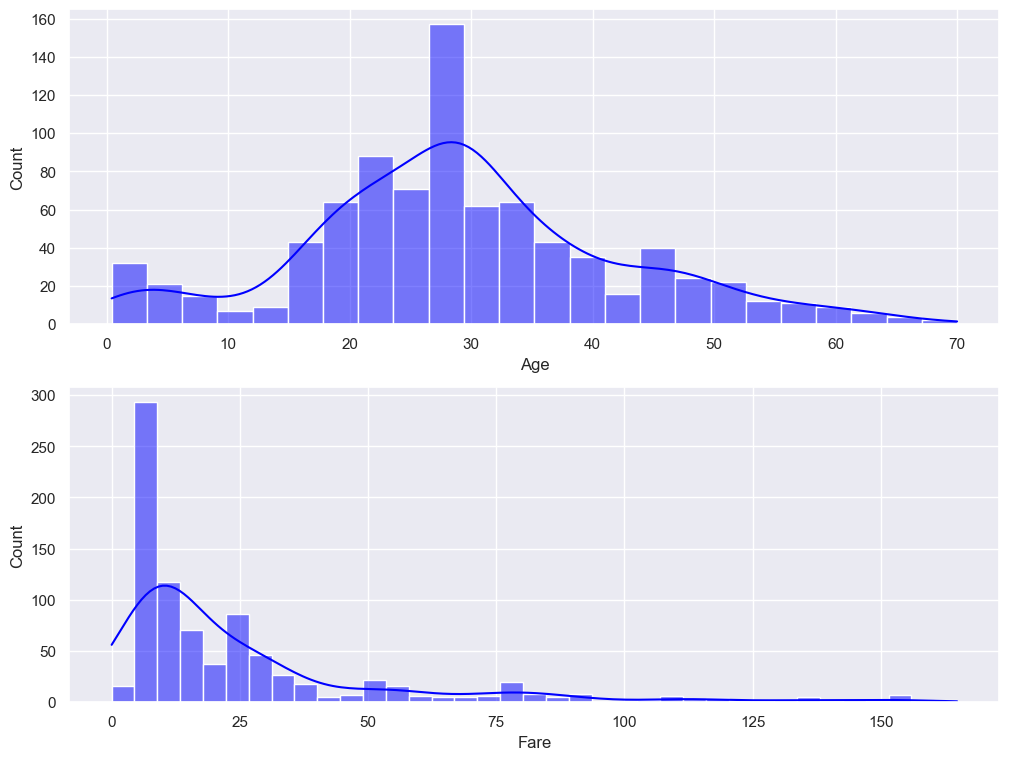

In [23]:
plt.figure(figsize=(12,9))
for i,col in enumerate(['Age','Fare']):
    plt.subplot(2,1,i+1)
    sns.histplot(data=df,x=col,kde=True,color="blue")

In [24]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

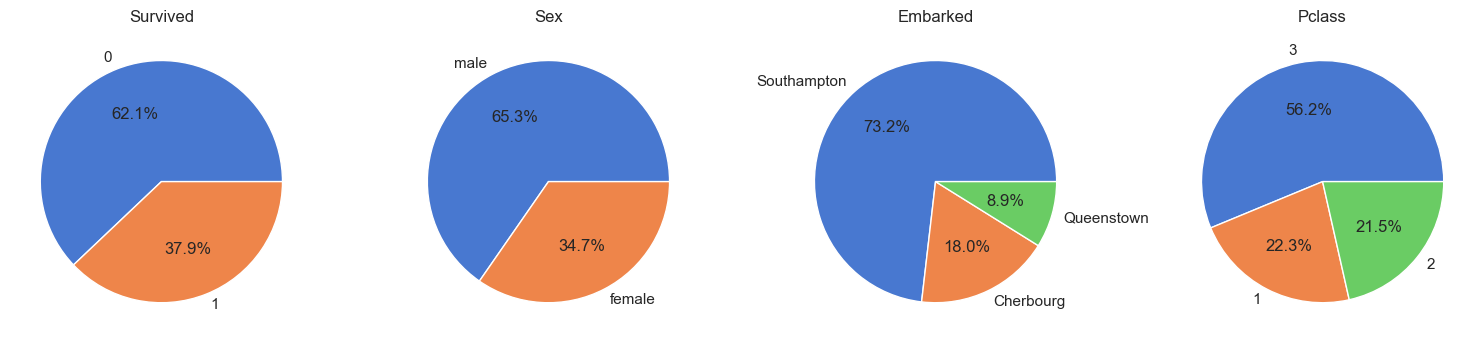

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(15, 12))

# Assuming df is your DataFrame containing 'Survived', 'Sex', 'Embarked', 'Pclass' columns
for i, col in enumerate(['Survived', 'Sex', 'Embarked', 'Pclass']):
    plt.subplot(1, 4, i + 1)
    x = df[col].value_counts().reset_index()  # Get counts and reset index
    plt.title(f"{col}")
    plt.pie(x=x.iloc[:, 1], labels=x.iloc[:, 0], autopct="%0.1f%%")  # Use iloc to access columns by index

plt.tight_layout()
plt.show()


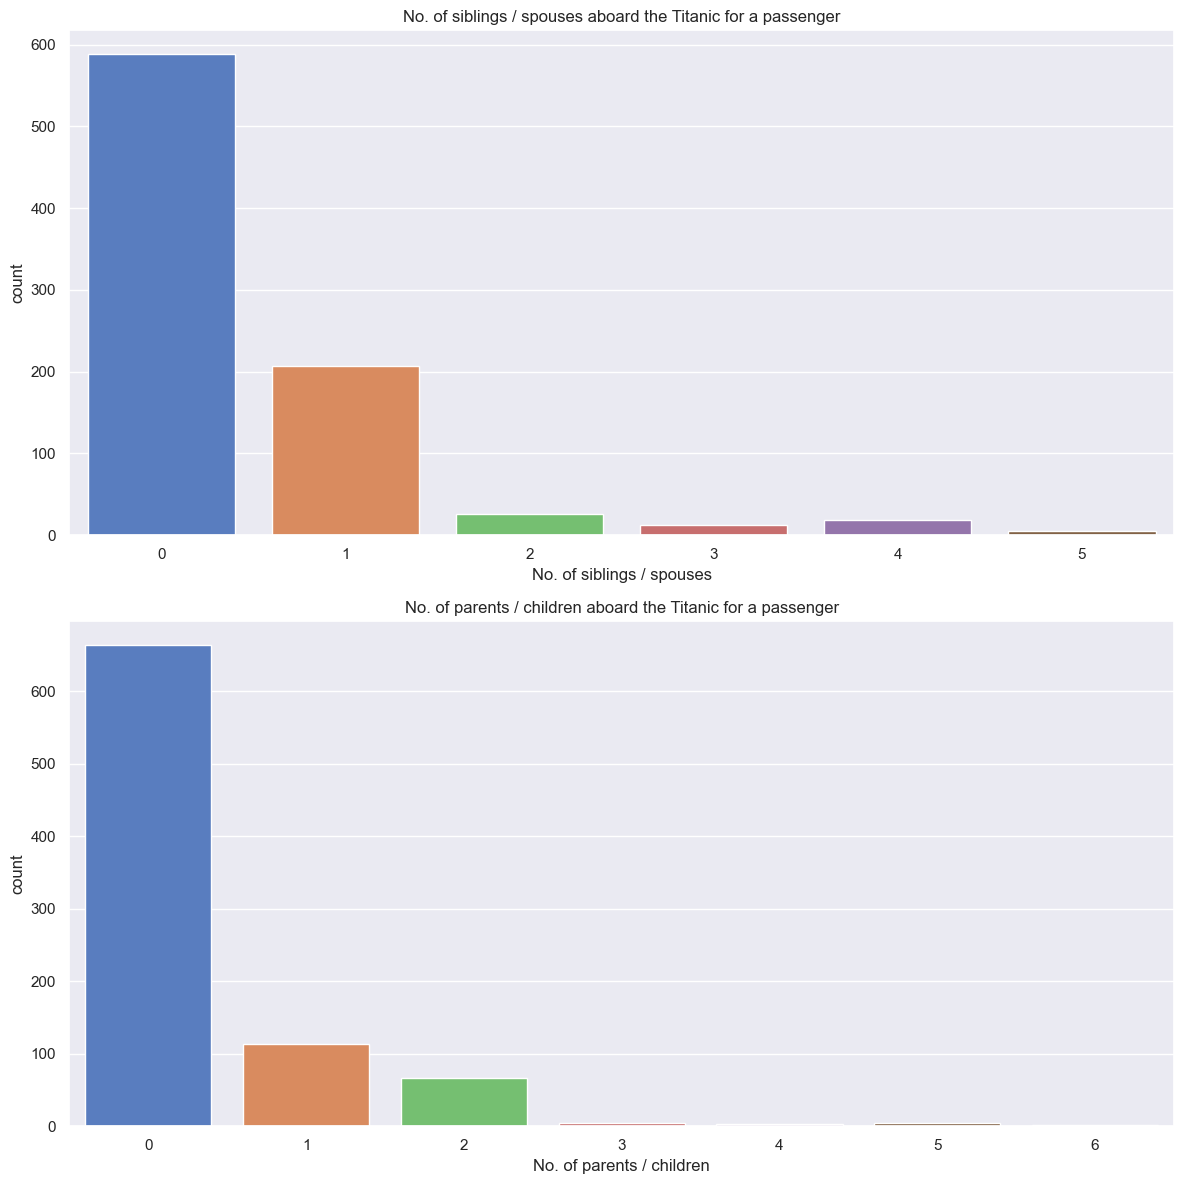

In [26]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
sns.countplot(data=df, x="SibSp")
plt.title("No. of siblings / spouses aboard the Titanic for a passenger")
plt.xlabel("No. of siblings / spouses")

plt.subplot(2, 1, 2)
sns.countplot(data=df, x="Parch")
plt.title("No. of parents / children aboard the Titanic for a passenger")
plt.xlabel("No. of parents / children")

plt.tight_layout()
plt.show()


In [27]:
df.groupby("Survived")["Age"].mean()

Survived
0    30.270726
1    27.438023
Name: Age, dtype: float64

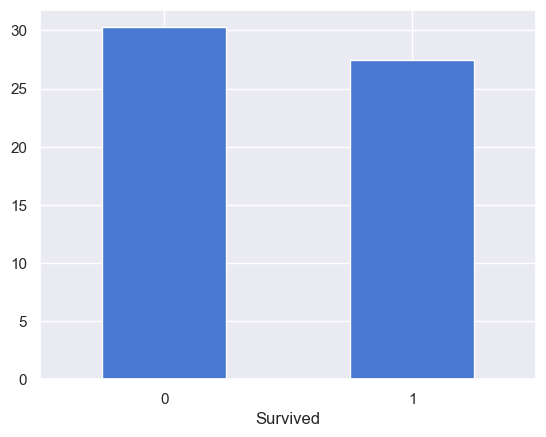

In [28]:
df.groupby("Survived")["Age"].mean().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

In [29]:
df.groupby("Survived")["Fare"].mean()

Survived
0    19.026055
1    37.567334
Name: Fare, dtype: float64

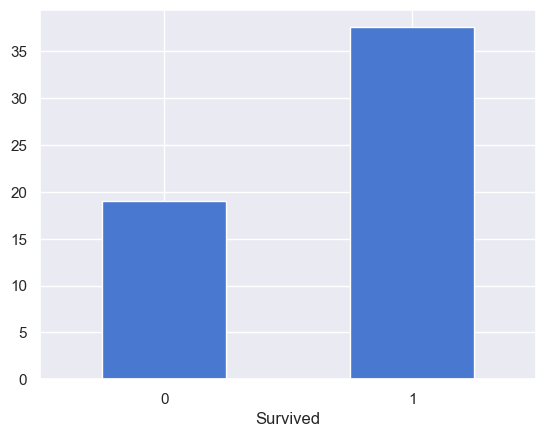

In [30]:
df.groupby("Survived")["Fare"].mean().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

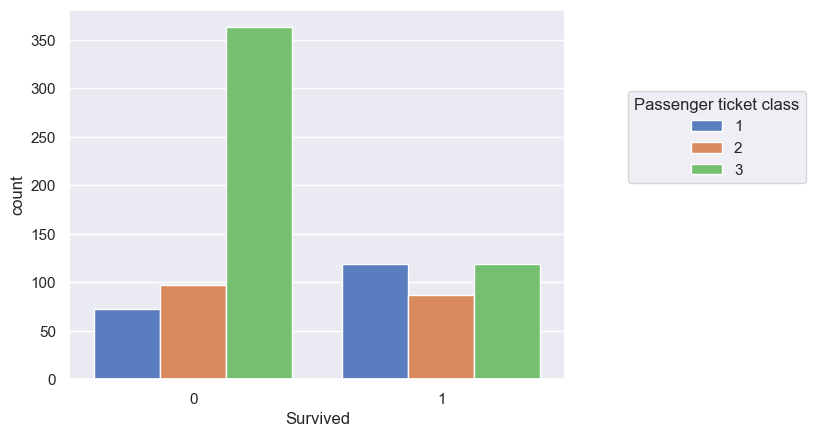

In [31]:
sns.countplot(data=df,x="Survived",hue="Pclass")
plt.legend(bbox_to_anchor=(1.5,0.8),title="Passenger ticket class")
plt.show()

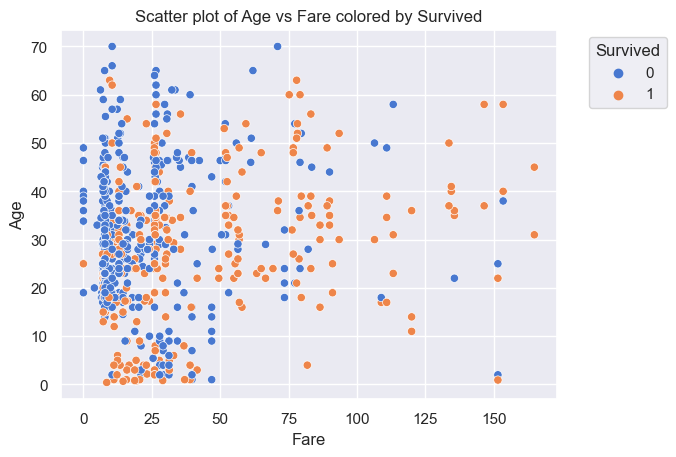

In [34]:
sns.scatterplot(data=df, x='Fare', y='Age', hue='Survived')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Survived')
plt.title('Scatter plot of Age vs Fare colored by Survived')
plt.xlabel('Fare')
plt.ylabel('Age')

plt.show()

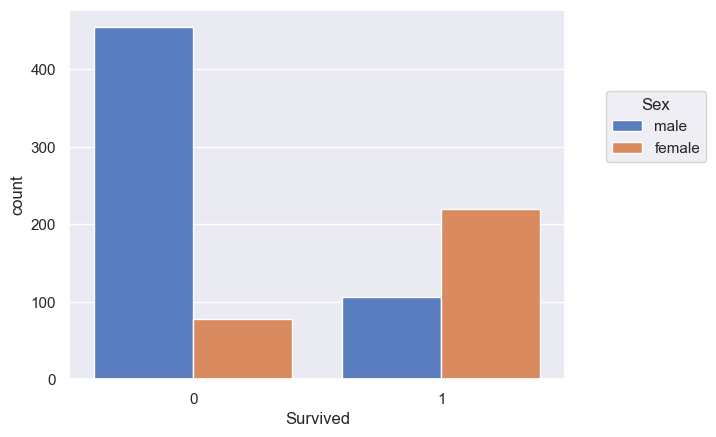

In [36]:
sns.countplot(data=df,x="Survived",hue="Sex")
plt.legend(bbox_to_anchor=(1.3,0.8),title="Sex")
plt.show()

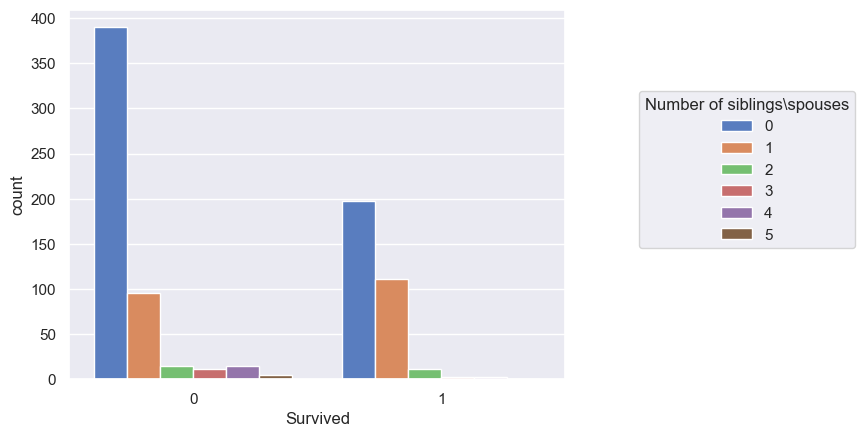

In [37]:
sns.countplot(data=df,x="Survived",hue="SibSp")
plt.legend(bbox_to_anchor=(1.6,0.8),title="Number of siblings\spouses")
plt.show()

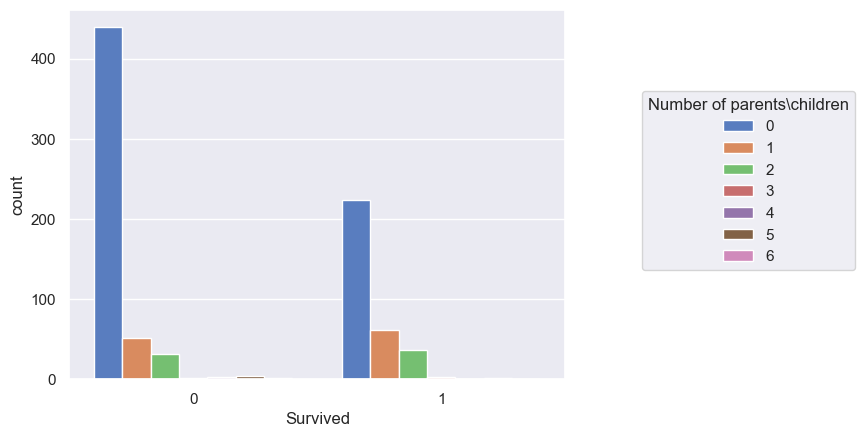

In [38]:
sns.countplot(data=df,x="Survived",hue="Parch")
plt.legend(bbox_to_anchor=(1.6,0.8),title="Number of parents\children")
plt.show()

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
import scikitplot as skplt

In [44]:
def one_hot_encoding(data=None):
    dums = pd.get_dummies(df[["Sex","Embarked"]],dtype=int)
    dums_df = pd.concat([dums,df],axis=1).drop(columns=['Sex','Embarked']).reset_index(drop=True)
    return dums_df

In [46]:
model_data = one_hot_encoding(df)

In [47]:
model_data

,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,3,22.000000,1,0,7.2500
1,1,0,1,0,0,1,1,38.000000,1,0,71.2833
2,1,0,0,0,1,1,3,26.000000,0,0,7.9250
3,1,0,0,0,1,1,1,35.000000,1,0,53.1000
4,0,1,0,0,1,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...
852,0,1,0,0,1,0,2,27.000000,0,0,13.0000
853,1,0,0,0,1,1,1,19.000000,0,0,30.0000
854,1,0,0,0,1,0,3,27.966667,1,2,23.4500
855,0,1,1,0,0,1,1,26.000000,0,0,30.0000


In [48]:
corr = model_data.corr()

<Axes: >

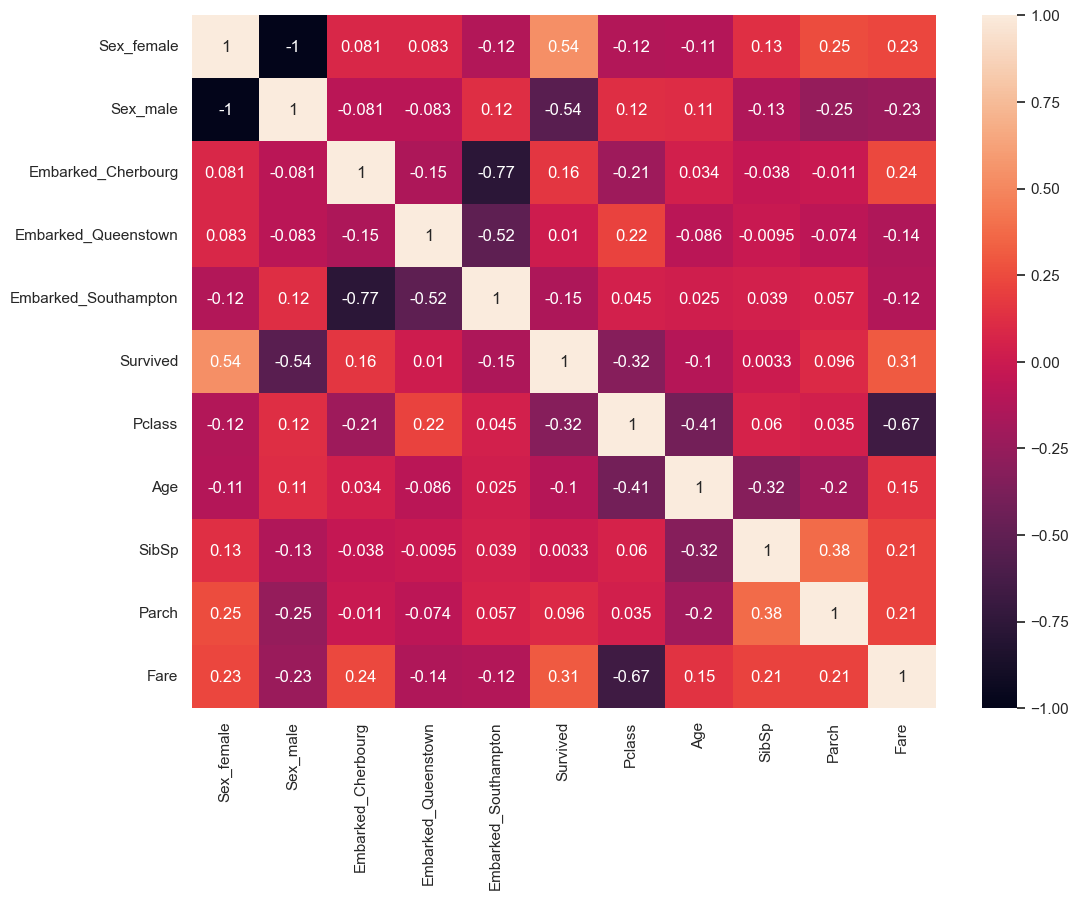

In [49]:
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)

In [50]:
X = model_data.drop(columns="Survived")
y = model_data["Survived"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [51]:
scaler = MinMaxScaler()
scaler.fit(X[['Fare','Age']])
X[['Fare','Age']]=scaler.transform(X[['Fare','Age']])

In [54]:
gbc_model = GradientBoostingClassifier()

In [55]:
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [56]:
gbc_model.score(X_train,y_train)

0.9036496350364963

In [57]:
gbc_model.score(X_test,y_test)

0.877906976744186

In [58]:
score = cross_val_score(gbc_model,X,y,cv=10)
avg = np.mean(score)
print(f"cross validation score for Gradient Boost:{score}")
print(f"average cross validation score for Gradient Boost:{avg}\n")

cross validation score for Gradient Boost:[0.8372093  0.8255814  0.80232558 0.88372093 0.86046512 0.87209302
 0.86046512 0.83529412 0.84705882 0.85882353]
average cross validation score for Gradient Boost:0.8483036935704513



In [59]:
y_predicted = gbc_model.predict(X_test)
y_proba=gbc_model.predict_proba(X_test)

In [60]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       109
           1       0.86      0.79      0.83        63

    accuracy                           0.88       172
   macro avg       0.87      0.86      0.87       172
weighted avg       0.88      0.88      0.88       172



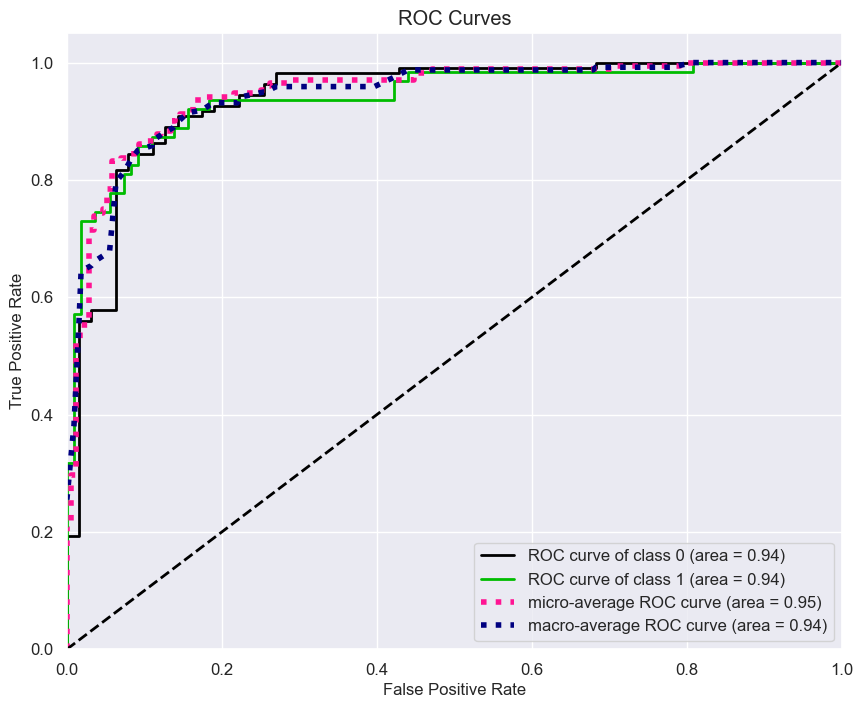

In [61]:
skplt.metrics.plot_roc(y_test,y_proba,figsize=(10,8))
plt.show()

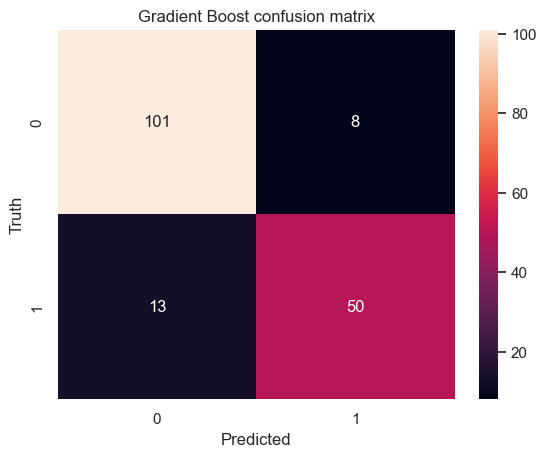

In [62]:
cm = skplt.metrics.confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title(f"Gradient Boost confusion matrix")
plt.show()

In [63]:
new_data = pd.DataFrame({'Pclass':[3],'Sex':['male'],'Age':[52],'SibSp':[1],'Parch':[1],'Fare':[12],'Embarked':['Southampton']})

In [64]:
new_data =one_hot_encoding(new_data)
new_data =new_data.reindex(columns=X.columns,fill_value=0)
new_data[['Fare','Age']]=scaler.transform(new_data[['Fare','Age']])

In [65]:
new_data

,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,3,0.310147,1,0,0.043975
1,1,0,1,0,0,1,0.540098,1,0,0.432369
2,1,0,0,0,1,3,0.367634,0,0,0.048069
3,1,0,0,0,1,1,0.496982,1,0,0.322078
4,0,1,0,0,1,3,0.496982,0,0,0.048827
...,...,...,...,...,...,...,...,...,...,...
852,0,1,0,0,1,2,0.382006,0,0,0.078852
853,1,0,0,0,1,1,0.267031,0,0,0.181965
854,1,0,0,0,1,3,0.395899,1,2,0.142236
855,0,1,1,0,0,1,0.367634,0,0,0.181965


In [67]:
prediction = gbc_model.predict(new_data)

for pred in prediction:
    if pred == 0:
        print("Passenger didn't survive")
    else:
        print("Passenger survived")

Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger survived
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger survived
Passenger didn't survive
Passenger didn't survive
Passenger survived
Passenger didn't survive
Passenger didn't survive
Passenger survived
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger survived
Passenger survived
Passenger survived
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger didn't survive
Passenger survive